In [50]:
import pandas as pd
from pandas import Series, DataFrame

In [51]:
london_temp_file = "https://milliams.com/courses/data_analysis_python/cetml1659on.txt"
df = DataFrame(pd.read_csv(
    london_temp_file,
    skiprows = 6,
    delim_whitespace = True,
    na_values = ["-99.9", "-99.99"]
))
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,5.4,4.9,5.8,7.5,12.5,15.2,16.9,17.0,16.0,10.9,5.6,6.0,10.34
2017,4.0,6.1,8.7,8.9,13.2,16.0,16.8,15.6,13.5,12.4,6.8,4.8,10.58
2018,5.3,2.9,4.9,9.8,13.2,16.1,19.1,16.6,13.7,10.6,8.3,6.9,10.68
2019,4.0,6.7,7.8,9.1,11.1,14.2,17.5,17.1,14.3,10.0,6.2,5.8,10.34


<AxesSubplot:>

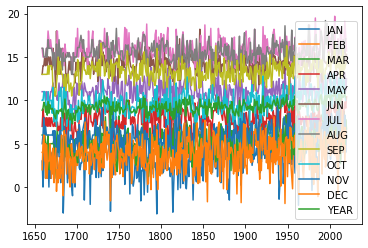

In [52]:
df.plot()

Text(0.5, 0, 'Year')

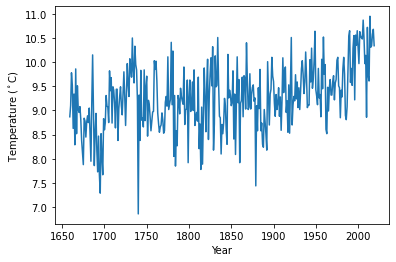

In [53]:
year_plot = df["YEAR"].plot()
year_plot.set_ylabel("Temperature ($^\circ$C)")
year_plot.set_xlabel("Year")

Creating bar chart of temmp per decade

In [54]:
df.index # gets index values

Int64Index([1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668,
            ...
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', length=362)

In [55]:
years = Series(df.index, index = df.index).apply(str) # making string series of years
years

1659    1659
1660    1660
1661    1661
1662    1662
1663    1663
        ... 
2016    2016
2017    2017
2018    2018
2019    2019
2020    2020
Length: 362, dtype: object

In [56]:
decade = years.apply(lambda x: x[:3] + "0") # lambda func to take 1st 3 chars in each year and add 0 to the end

In [57]:
df["decade"] = decade
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,decade
1659,3.0,4.0,6.0,7.0,11.0,13.0,16.0,16.0,13.0,10.0,5.0,2.0,8.87,1650
1660,0.0,4.0,6.0,9.0,11.0,14.0,15.0,16.0,13.0,10.0,6.0,5.0,9.10,1660
1661,5.0,5.0,6.0,8.0,11.0,14.0,15.0,15.0,13.0,11.0,8.0,6.0,9.78,1660
1662,5.0,6.0,6.0,8.0,11.0,15.0,15.0,15.0,13.0,11.0,6.0,3.0,9.52,1660
1663,1.0,1.0,5.0,7.0,10.0,14.0,15.0,15.0,13.0,10.0,7.0,5.0,8.63,1660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,5.4,4.9,5.8,7.5,12.5,15.2,16.9,17.0,16.0,10.9,5.6,6.0,10.34,2010
2017,4.0,6.1,8.7,8.9,13.2,16.0,16.8,15.6,13.5,12.4,6.8,4.8,10.58,2010
2018,5.3,2.9,4.9,9.8,13.2,16.1,19.1,16.6,13.7,10.6,8.3,6.9,10.68,2010
2019,4.0,6.7,7.8,9.1,11.1,14.2,17.5,17.1,14.3,10.0,6.2,5.8,10.34,2010


In [58]:
by_decade = df.groupby("decade").mean() # groups by the same decade and finds average
by_decade.head(7)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
decade,,,,,,,,,,,,,
1650,3.00,4.00,6.00,7.00,11.00,13.00,16.00,16.00,13.00,10.00,5.00,2.00,8.870
1660,2.60,4.00,5.10,7.70,10.60,14.50,16.00,15.70,13.30,10.00,6.30,3.80,9.157
1670,3.25,2.35,4.50,7.25,11.05,14.40,15.80,15.25,12.40,8.95,5.20,2.45,8.607
1680,2.50,2.80,4.80,7.40,11.45,14.00,15.45,14.90,12.70,9.55,5.45,4.05,8.785
1690,1.89,2.49,3.99,6.79,9.60,13.44,15.27,14.65,11.93,8.64,5.26,3.31,8.134
1700,2.95,3.60,4.84,7.72,11.38,14.17,16.03,16.29,13.13,8.96,6.04,4.00,9.122
1710,2.85,3.85,5.20,7.70,10.90,14.45,15.95,15.55,13.50,9.70,6.05,4.10,9.177


<AxesSubplot:xlabel='decade'>

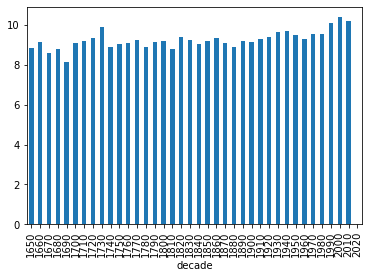

In [59]:
by_decade["YEAR"].plot.bar()

Saving plot to file

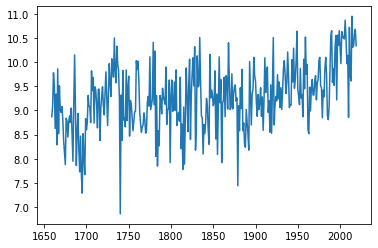

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

df["YEAR"].plot(ax = ax)

fig.savefig("myplot.png")

Displaying a picture

![](myplot.png)